In [153]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
%matplotlib inline

## 0.Load Image

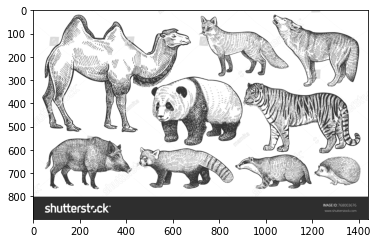

In [141]:
im = cv2.imread('input.jpg')
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

## 1.Remove necessary area

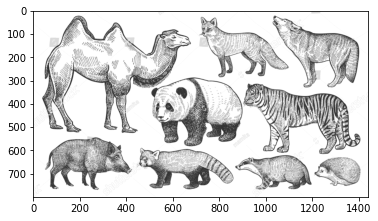

In [142]:
im = im[:800,:]
gray = gray[:800,:]
plt.imshow(gray,cmap='gray')

## 2.Remove background

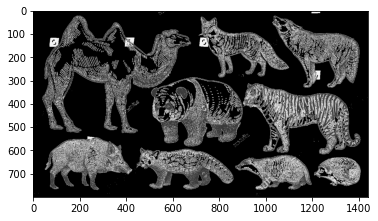

In [143]:
gray[gray >= 230] = 0
plt.imshow(test, cmap='gray')

## 3.Binarization

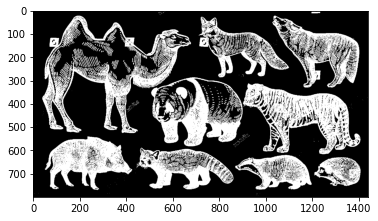

In [144]:
ret,binary = cv2.threshold(gray,10,255,cv2.THRESH_BINARY)
plt.imshow(binary, cmap='gray')

## Build Segmentation map

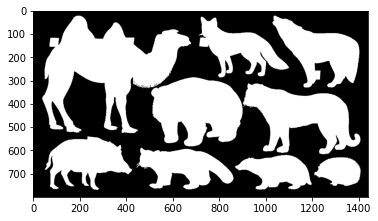

In [145]:
threshold_area = 150*150
contours, hier = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
seg_map = np.zeros_like(gray)

for c in contours:
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(c)
    if not w*h < threshold_area and w > h:
        # draw a green rectangle to visualize the bounding rect
        cv2.fillPoly(seg_map, pts =[c], color=(255,255,255))

plt.imshow(seg_map, cmap='gray')

## Extracts animals separately

In [152]:
contours, hier = cv2.findContours(seg_map, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
index_animal = 1

for c in contours:
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(c)
    if not w*h < threshold_area and w > h:
        mask = np.zeros_like(seg_map)
        cv2.fillPoly(mask, pts =[c], color=(255,255,255))
        im_clone = im.copy()
        im_clone[mask == 0] = 0
        im_animal = im_clone[y:y+h,x:x+w,:]
        cv2.imwrite('{}.jpg'.format(index_animal), im_animal)
        index_animal += 1

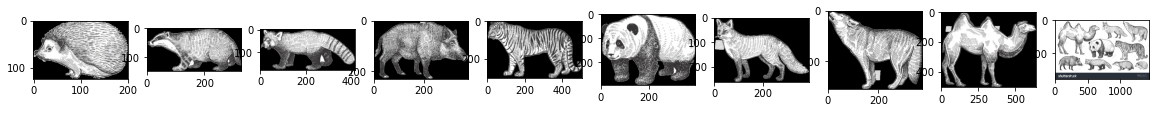

In [160]:
im_animals = glob.glob('./*.jpg')
im_animals = np.array([plt.imread(im_animal) for im_animal in im_animals])
_, axes = plt.subplots(1, len(im_animals), figsize=(20, 2))
for i in range(len(im_animals)):
    axes[i].imshow(im_animals[i])